In [1]:
import numpy as np
import os
import mxnet as mx
from mxnet import gluon
from mxnet import image
from mxnet import nd
from mxnet import init
from mxnet import autograd
from mxnet.gluon.data import vision
from mxnet.gluon import nn
from mxnet.gluon.model_zoo import vision as models
from PIL import Image
from jupyterthemes import jtplot
jtplot.style(theme='onedork', grid=False)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
os.environ['MXNET_GLUON_REPO']='https://apache-mxnet.s3.cn-north-1.amazonaws.com.cn/'

In [4]:
vgg19 = models.vgg19(pretrained=True)
resnet152 = models.resnet152_v1(pretrained=True)

In [5]:
data = nd.array(np.asarray(Image.open('/home/samael/github/meizi/000000.jpg')))

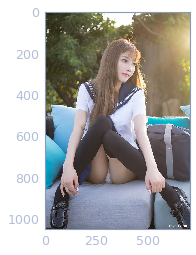

In [6]:
plt.imshow(np.asarray(Image.open('/home/samael/github/meizi/000000.jpg')))

In [7]:
data = mx.image.imresize(data, 224, 224)
data = nd.transpose(data, (2, 0, 1))
# data = data.astype(np.float32)/127.5-1
data = data.astype(np.float32)/255
data = data.reshape((1,)+data.shape)
print(data.shape)

(1, 3, 224, 224)


In [8]:
data.attach_grad()
with autograd.record():
    out = vgg19(data)
out.backward()

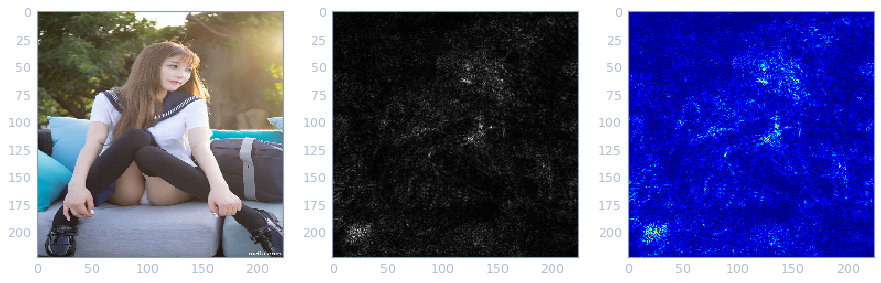

In [9]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow((data[0].asnumpy().transpose(1, 2, 0)*255).astype(np.uint8))
# plt.imshow(((data[0].asnumpy().transpose(1, 2, 0)+1)*127.5).astype(np.uint8))
plt.subplot(1, 3, 2)
plt.imshow(np.abs(data.grad.asnumpy()[0]).max(axis=0), cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(np.abs(data.grad.asnumpy()[0]).max(axis=0), cmap=plt.cm.jet)

In [10]:
data.attach_grad()
with autograd.record():
    out = resnet152(data)
out.backward()

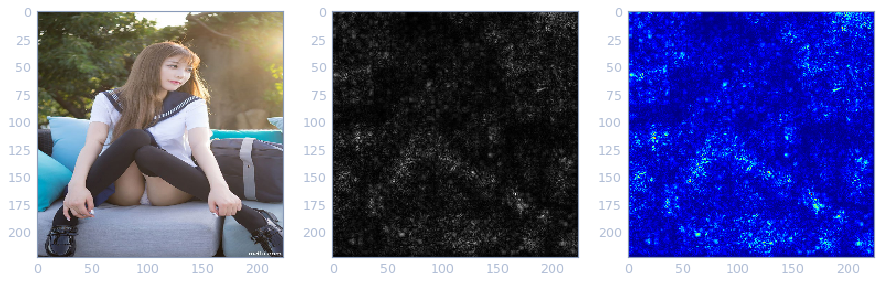

In [11]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow((data[0].asnumpy().transpose(1, 2, 0)*255).astype(np.uint8))
# plt.imshow(((data[0].asnumpy().transpose(1, 2, 0)+1)*127.5).astype(np.uint8))
plt.subplot(1, 3, 2)
plt.imshow(np.abs(data.grad.asnumpy()[0]).max(axis=0), cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(np.abs(data.grad.asnumpy()[0]).max(axis=0), cmap=plt.cm.jet)